## Integración y procesamiento de los datos

Primeramente importaremos todas las librerías que vamos a necesitar para el procesamiento de los datos, pandas para el manejo de data frames, matplotlib para generar las gráficas, scipy para crear clusteres herarquicos y sklearn para hacer clusteres

Luego importamos los data sets y creamos un data frame por cada data set y uno adicional para poner los estadìsticos que caracterizan nuestros datos

Son dos data sets, el primero es la respuesta de un grupo de individuo a nuestra encuesta, el segundo para conocer los metadatos de la encuesta, que pregunta se relaciona con cual categría y subcategoría

In [3]:
import pandas as pd
from numpy.core.numeric import NaN
#import matplotlib.pyplot as plt
#import scipy.cluster.hierarchy as sch
#from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv("STCI.csv")
sub = pd.read_csv("PreguntaCategoria.csv", index_col="NumeroPregunta")

preproc = pd.DataFrame()
preproc = pd.DataFrame()

A continuación agrupamos las preguntas por categorías, luego por cada categoria vamos a obtener e valor de la misma, el porcentaje del total que se podia obtener y una media, por individuo y se guarda en preproc

In [49]:
categoria = sub.groupby(['Categoria'])

preproc["Nombre"] = df["Nombre"]
for i in categoria:
    preproc[i[0]] = df[list(categoria.get_group(i[0])["Pregunta"])].sum(axis=1)
    preproc["Porcentaje " + i[0]] =(df[list(categoria.get_group(i[0])["Pregunta"])].sum(axis=1)-20)/60*100
    preproc["Media " + i[0]] = df[list(categoria.get_group(i[0])["Pregunta"])].mean(axis=1)
preproc

,Nombre,Alegria,Porcentaje Alegria,Media Alegria,Mal humor,Porcentaje Mal humor,Media Mal humor,Seriedad,Porcentaje Seriedad,Media Seriedad
0,0,21.0,1.666667,1.05,73.0,88.333333,3.65,59.0,65.000000,2.95
1,1,59.0,65.000000,2.95,59.0,65.000000,2.95,58.0,63.333333,2.90
2,2,20.0,0.000000,1.00,78.0,96.666667,3.90,62.0,70.000000,3.10
3,3,23.0,5.000000,1.15,77.0,95.000000,3.85,57.0,61.666667,2.85
4,4,69.0,81.666667,3.45,53.0,55.000000,2.65,63.0,71.666667,3.15
...,...,...,...,...,...,...,...,...,...,...
115,115,20.0,0.000000,1.00,80.0,100.000000,4.00,57.0,61.666667,2.85
116,116,80.0,100.000000,4.00,20.0,0.000000,1.00,33.0,21.666667,1.65
117,117,74.0,90.000000,3.70,26.0,10.000000,1.30,43.0,38.333333,2.15
118,118,79.0,98.333333,3.95,20.0,0.000000,1.00,45.0,41.666667,2.25


A continuacion se calcula de similar forma el promedio por subcategoría a cada individuo

In [50]:
subcategoria = sub.groupby(['SubCategoria'])

for i in subcategoria:
    preproc[i[0]] = df[list(subcategoria.get_group(i[0])["Pregunta"])].mean(axis=1)
preproc

,Nombre,Alegria,Porcentaje Alegria,Media Alegria,Mal humor,Porcentaje Mal humor,Media Mal humor,Seriedad,Porcentaje Seriedad,Media Seriedad,...,Percepcion de que los eventos de la vida diaria son serios e importantes.,Preferir actividades concretas y racionales,Prevalencia de animo alegre.,Prevalencia de estados serios.,Prevalencia de mal humor,Prevalencia de tristeza,Sentimientos de irritabilidad.,Tristeza en situaciones alegres.,Vision positiva de las circunstancias adversas de la vida.,Vivir en torno a metas.
0,0,21.0,1.666667,1.05,73.0,88.333333,3.65,59.0,65.000000,2.95,...,1.50,3.00,1.0,3.75,3.4,3.333333,4.0,4.0,1.00,3.50
1,1,59.0,65.000000,2.95,59.0,65.000000,2.95,58.0,63.333333,2.90,...,3.00,2.75,3.0,3.50,1.0,4.000000,4.0,1.0,3.00,2.25
2,2,20.0,0.000000,1.00,78.0,96.666667,3.90,62.0,70.000000,3.10,...,3.00,3.00,1.0,2.50,4.0,4.000000,4.0,3.0,1.00,3.00
3,3,23.0,5.000000,1.15,77.0,95.000000,3.85,57.0,61.666667,2.85,...,3.00,2.00,1.0,3.00,4.0,3.833333,4.0,3.0,1.25,3.00
4,4,69.0,81.666667,3.45,53.0,55.000000,2.65,63.0,71.666667,3.15,...,4.00,3.00,3.8,4.00,4.0,1.000000,4.0,1.0,2.75,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,20.0,0.000000,1.00,80.0,100.000000,4.00,57.0,61.666667,2.85,...,3.75,3.00,1.0,3.00,4.0,4.000000,4.0,4.0,1.00,1.75
116,116,80.0,100.000000,4.00,20.0,0.000000,1.00,33.0,21.666667,1.65,...,2.00,2.00,4.0,2.00,1.0,1.000000,1.0,1.0,4.00,1.25
117,117,74.0,90.000000,3.70,26.0,10.000000,1.30,43.0,38.333333,2.15,...,2.75,1.00,2.8,2.00,1.0,1.000000,2.0,1.0,4.00,3.00
118,118,79.0,98.333333,3.95,20.0,0.000000,1.00,45.0,41.666667,2.25,...,2.50,2.00,4.0,2.75,1.0,1.000000,1.0,1.0,4.00,1.75


Ahora obtenemos en un df los resultados por cada dato obtenido como promedio de todos los individuos

In [51]:
preproc.loc[:, "Alegria":]

,Alegria,Porcentaje Alegria,Media Alegria,Mal humor,Porcentaje Mal humor,Media Mal humor,Seriedad,Porcentaje Seriedad,Media Seriedad,"Amplio rango de desencadenadores de alegria, risa y sonrisa",...,Percepcion de que los eventos de la vida diaria son serios e importantes.,Preferir actividades concretas y racionales,Prevalencia de animo alegre.,Prevalencia de estados serios.,Prevalencia de mal humor,Prevalencia de tristeza,Sentimientos de irritabilidad.,Tristeza en situaciones alegres.,Vision positiva de las circunstancias adversas de la vida.,Vivir en torno a metas.
0,21.0,1.666667,1.05,73.0,88.333333,3.65,59.0,65.000000,2.95,1.00,...,1.50,3.00,1.0,3.75,3.4,3.333333,4.0,4.0,1.00,3.50
1,59.0,65.000000,2.95,59.0,65.000000,2.95,58.0,63.333333,2.90,2.00,...,3.00,2.75,3.0,3.50,1.0,4.000000,4.0,1.0,3.00,2.25
2,20.0,0.000000,1.00,78.0,96.666667,3.90,62.0,70.000000,3.10,1.00,...,3.00,3.00,1.0,2.50,4.0,4.000000,4.0,3.0,1.00,3.00
3,23.0,5.000000,1.15,77.0,95.000000,3.85,57.0,61.666667,2.85,1.00,...,3.00,2.00,1.0,3.00,4.0,3.833333,4.0,3.0,1.25,3.00
4,69.0,81.666667,3.45,53.0,55.000000,2.65,63.0,71.666667,3.15,3.75,...,4.00,3.00,3.8,4.00,4.0,1.000000,4.0,1.0,2.75,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,20.0,0.000000,1.00,80.0,100.000000,4.00,57.0,61.666667,2.85,1.00,...,3.75,3.00,1.0,3.00,4.0,4.000000,4.0,4.0,1.00,1.75
116,80.0,100.000000,4.00,20.0,0.000000,1.00,33.0,21.666667,1.65,4.00,...,2.00,2.00,4.0,2.00,1.0,1.000000,1.0,1.0,4.00,1.25
117,74.0,90.000000,3.70,26.0,10.000000,1.30,43.0,38.333333,2.15,4.00,...,2.75,1.00,2.8,2.00,1.0,1.000000,2.0,1.0,4.00,3.00
118,79.0,98.333333,3.95,20.0,0.000000,1.00,45.0,41.666667,2.25,3.75,...,2.50,2.00,4.0,2.75,1.0,1.000000,1.0,1.0,4.00,1.75


In [52]:
result = (preproc.loc[:, "Alegria":].sum()/df["Nombre"].count()).to_dict()
result

{'Alegria': 51.125,
 'Porcentaje Alegria': 51.875,
 'Media Alegria': 2.55625,
 'Mal humor': 50.391666666666666,
 'Porcentaje Mal humor': 50.65277777777778,
 'Media Mal humor': 2.5195833333333337,
 'Seriedad': 53.40833333333333,
 'Porcentaje Seriedad': 55.68055555555556,
 'Media Seriedad': 2.6704166666666667,
 'Amplio rango de desencadenadores de alegria, risa y sonrisa': 2.5145833333333334,
 'Bajo umbral para la risa y sonrisa.': 2.6055555555555556,
 'Estilo de comunicacion sobrio.': 2.59375,
 'Estilo de interaccion alegre': 2.5541666666666667,
 'Irritabilidad en situaciones alegres.': 2.591666666666667,
 'Percepcion de que los eventos de la vida diaria son serios e importantes.': 2.6125,
 'Preferir actividades concretas y racionales': 2.7020833333333334,
 'Prevalencia de animo alegre.': 2.581666666666666,
 'Prevalencia de estados serios.': 2.7979166666666666,
 'Prevalencia de mal humor': 2.4366666666666665,
 'Prevalencia de tristeza': 2.5,
 'Sentimientos de irritabilidad.': 2.59444444

Tambien es interesante conocer la moda y el porcentaje de la moda en el total por cada categoría

In [53]:
moda = { 
        "Alegria" : {
            "valor": preproc["Media Alegria"].round().mode()[0], 
            "porcentaje": preproc["Media Alegria"].round().value_counts(normalize=True).max()*100
        },
        "Seriedad" : {
            "valor": preproc["Media Seriedad"].round().mode()[0], 
            "porcentaje": preproc["Media Seriedad"].round().value_counts(normalize=True).max()*100
        },
        "Mal humor": {
            "valor": preproc["Media Mal humor"].round().mode()[0], 
            "porcentaje": preproc["Media Mal humor"].round().value_counts(normalize=True).max()*100
        }
    }
moda

{'Alegria': {'valor': 1.0, 'porcentaje': 31.666666666666664},
 'Seriedad': {'valor': 3.0, 'porcentaje': 65.83333333333333},
 'Mal humor': {'valor': 1.0, 'porcentaje': 32.5}}

Además puede ser interesante calcular las correlaciones entre categorias y subcatetgorias en nuestra población

In [54]:
corr = preproc.iloc[:,[0,3,6,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].corr()
corr

,Nombre,Media Alegria,Media Mal humor,Media Seriedad,"Amplio rango de desencadenadores de alegria, risa y sonrisa",Bajo umbral para la risa y sonrisa.,Estilo de comunicacion sobrio.,Estilo de interaccion alegre,Irritabilidad en situaciones alegres.,Percepcion de que los eventos de la vida diaria son serios e importantes.,Preferir actividades concretas y racionales,Prevalencia de animo alegre.,Prevalencia de estados serios.,Prevalencia de mal humor,Prevalencia de tristeza,Sentimientos de irritabilidad.,Tristeza en situaciones alegres.,Vision positiva de las circunstancias adversas de la vida.
Nombre,1.000000,-0.005081,-0.100307,-0.081050,0.022495,0.020616,-0.100683,0.042200,-0.048839,-0.096039,0.057778,-0.004976,-0.076624,-0.091927,-0.064935,-0.126721,-0.031029,-0.098144
Media Alegria,-0.005081,1.000000,-0.901888,-0.614242,0.934908,0.925826,-0.493931,0.947341,-0.798209,-0.313385,-0.378278,0.938275,-0.340229,-0.774061,-0.788738,-0.752036,-0.783884,0.957840
Media Mal humor,-0.100307,-0.901888,1.000000,0.700394,-0.838201,-0.850940,0.535937,-0.872208,0.780502,0.381950,0.456164,-0.846006,0.402977,0.846931,0.866092,0.891414,0.802387,-0.839271
Media Seriedad,-0.081050,-0.614242,0.700394,1.000000,-0.588206,-0.612769,0.685076,-0.578826,0.577738,0.614426,0.644647,-0.561896,0.611983,0.631401,0.545115,0.631651,0.612345,-0.562620
"Amplio rango de desencadenadores de alegria, risa y sonrisa",0.022495,0.934908,-0.838201,-0.588206,1.000000,0.847281,-0.463739,0.842255,-0.744034,-0.282657,-0.338489,0.826600,-0.368588,-0.719938,-0.749959,-0.686445,-0.713138,0.889906
Bajo umbral para la risa y sonrisa.,0.020616,0.925826,-0.850940,-0.612769,0.847281,1.000000,-0.465292,0.868393,-0.748072,-0.368822,-0.341730,0.827869,-0.338775,-0.724948,-0.712551,-0.717494,-0.826389,0.858265
Estilo de comunicacion sobrio.,-0.100683,-0.493931,0.535937,0.685076,-0.463739,-0.465292,1.000000,-0.483477,0.478525,0.214053,0.303194,-0.436596,0.267915,0.489023,0.424926,0.493175,0.382058,-0.482944
Estilo de interaccion alegre,0.042200,0.947341,-0.872208,-0.578826,0.842255,0.868393,-0.483477,1.000000,-0.735971,-0.277219,-0.382550,0.855849,-0.322513,-0.748927,-0.743648,-0.756739,-0.743924,0.895026
Irritabilidad en situaciones alegres.,-0.048839,-0.798209,0.780502,0.577738,-0.744034,-0.748072,0.478525,-0.735971,1.000000,0.284937,0.320909,-0.772887,0.365450,0.563736,0.664400,0.696410,0.702757,-0.750566
Percepcion de que los eventos de la vida diaria son serios e importantes.,-0.096039,-0.313385,0.381950,0.614426,-0.282657,-0.368822,0.214053,-0.277219,0.284937,1.000000,0.362296,-0.305923,0.146117,0.329460,0.291218,0.359806,0.358353,-0.256927


Luego guardamos todos estos resultaddos en descripcion de nuestra problacion, donde accedemos en busca de información al respecto

In [55]:
descr = {
    "descripcion": preproc,
    "resultado": result,
    "moda": moda,
    "correlacion por categoria y subcategoria": corr
}
descr

{'descripcion':      Nombre  Alegria  Porcentaje Alegria  Media Alegria  Mal humor  \
 0         0     21.0            1.666667           1.05       73.0   
 1         1     59.0           65.000000           2.95       59.0   
 2         2     20.0            0.000000           1.00       78.0   
 3         3     23.0            5.000000           1.15       77.0   
 4         4     69.0           81.666667           3.45       53.0   
 ..      ...      ...                 ...            ...        ...   
 115     115     20.0            0.000000           1.00       80.0   
 116     116     80.0          100.000000           4.00       20.0   
 117     117     74.0           90.000000           3.70       26.0   
 118     118     79.0           98.333333           3.95       20.0   
 119     119     22.0            3.333333           1.10       80.0   
 
      Porcentaje Mal humor  Media Mal humor  Seriedad  Porcentaje Seriedad  \
 0               88.333333             3.65      59.0

Luego, se puede en caso de necesitarlo hacer una agrupación de los datos con un oar cualquiera de variables, ya sea entre las categpías o si se hacce una nueva encuesta entre la variable dada por la encuesta y otra variable dada lo mismo por una encuesta como por alguna categoría o sub categoria

primero hacemos el clúster jerárquico, y lo graficamos, luego un clúster por aglomeración y tambien lo graficamos

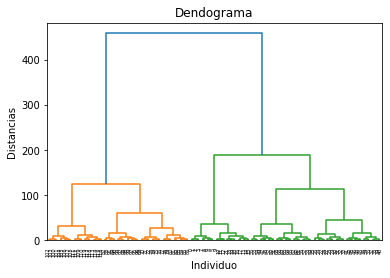

In [56]:
subcat = preproc.iloc[:,[0,9]]

denograma = sch.dendrogram(sch.linkage(subcat, method='ward'))

plt.title('Dendograma')
plt.xlabel('Individuo')
plt.ylabel('Distancias')
plt.show()

In [57]:
#hc = AgglomerativeClustering(n_clusters = 4, affinity= 'euclidean', linkage='ward')

#y_hc = hc.fit_predict(subcat)
#y_hc

In [58]:
#plt.scatter(subcat.iloc[:,0][y_hc == 0], subcat.iloc[:,1][y_hc == 0], s=80, c='red', label = 'Cluster 1')
#plt.scatter(subcat.iloc[:,0][y_hc == 1], subcat.iloc[:,1][y_hc == 1], s=80, c='blue', label = 'Cluster 2')
#plt.scatter(subcat.iloc[:,0][y_hc == 2], subcat.iloc[:,1][y_hc == 2], s=80, c='green', label = 'Cluster 3')
#plt.scatter(subcat.iloc[:,0][y_hc == 3], subcat.iloc[:,1][y_hc == 3], s=80, c='magenta', label = 'Cluster 4')

#plt.title("Clusters")
#plt.xlabel("Subcategoria x")
#plt.ylabel("Categiria y")
#plt.legend()
#plt.show()

### Resultado final a devolver



In [59]:
general = preproc.loc[:, "Alegria": "Media Seriedad"]
general.to_csv("Resultados en el grupo.csv")
general

,Alegria,Porcentaje Alegria,Media Alegria,Mal humor,Porcentaje Mal humor,Media Mal humor,Seriedad,Porcentaje Seriedad,Media Seriedad
0,21.0,1.666667,1.05,73.0,88.333333,3.65,59.0,65.000000,2.95
1,59.0,65.000000,2.95,59.0,65.000000,2.95,58.0,63.333333,2.90
2,20.0,0.000000,1.00,78.0,96.666667,3.90,62.0,70.000000,3.10
3,23.0,5.000000,1.15,77.0,95.000000,3.85,57.0,61.666667,2.85
4,69.0,81.666667,3.45,53.0,55.000000,2.65,63.0,71.666667,3.15
...,...,...,...,...,...,...,...,...,...
115,20.0,0.000000,1.00,80.0,100.000000,4.00,57.0,61.666667,2.85
116,80.0,100.000000,4.00,20.0,0.000000,1.00,33.0,21.666667,1.65
117,74.0,90.000000,3.70,26.0,10.000000,1.30,43.0,38.333333,2.15
118,79.0,98.333333,3.95,20.0,0.000000,1.00,45.0,41.666667,2.25


In [78]:
personal = preproc[(preproc["Nombre"] == 50)]

personal.to_csv("Resultados en la persona" + "50" +".csv", sep=',')
personal

ModuleNotFoundError: No module named 'openpyxl'

In [63]:
descripcion = {"Medias" : result, "Modas": moda}

print("Medias: ")
for d in result:
    print(d +": "+ str(round(result[d],2)))
print("Modas")
for d in moda:
    print(d +": ") 
    for m in moda[d]:
        print(m + ": " + str(round(moda[d][m],2)))

Medias: 
Alegria: 51.12
Porcentaje Alegria: 51.88
Media Alegria: 2.56
Mal humor: 50.39
Porcentaje Mal humor: 50.65
Media Mal humor: 2.52
Seriedad: 53.41
Porcentaje Seriedad: 55.68
Media Seriedad: 2.67
Amplio rango de desencadenadores de alegria, risa y sonrisa: 2.51
Bajo umbral para la risa y sonrisa.: 2.61
Estilo de comunicacion sobrio.: 2.59
Estilo de interaccion alegre: 2.55
Irritabilidad en situaciones alegres.: 2.59
Percepcion de que los eventos de la vida diaria son serios e importantes.: 2.61
Preferir actividades concretas y racionales: 2.7
Prevalencia de animo alegre.: 2.58
Prevalencia de estados serios.: 2.8
Prevalencia de mal humor: 2.44
Prevalencia de tristeza: 2.5
Sentimientos de irritabilidad.: 2.59
Tristeza en situaciones alegres.: 2.52
Vision positiva de las circunstancias adversas de la vida.: 2.53
Vivir en torno a metas.: 2.65
Modas
Alegria: 
valor: 1.0
porcentaje: 31.67
Seriedad: 
valor: 3.0
porcentaje: 65.83
Mal humor: 
valor: 1.0
porcentaje: 32.5
